In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.detector_factory import (
    DetectorType,
)
from segmenter_api.domain.factory.segmenter_factory import (
    SegmenterType,
)
from segmenter_api.usecase.service.text2segment import (
    Text2SegmentInput,
    Text2SegmentUsecase,
)
from segmenter_api.utils.image import draw_bboxes

In [3]:
image_path = Path("data/multiple_products.png")
image = Image.open(image_path)

In [4]:
text2segment_usecase = resolve(Text2SegmentUsecase)

In [5]:
text2segment_output = text2segment_usecase.text2segment(
    text2segment_input=Text2SegmentInput(
        texts=["cosmetics"],
        image=image,
        detector_type=DetectorType.FLORENCE2,
        segmenter_type=SegmenterType.SAM2,
    )
)

{"severity": "INFO", "timestamp": "2025-04-22_07:21:08", "message": "関数Text2SegmentUsecase.text2segmentが開始"}
{"severity": "INFO", "timestamp": "2025-04-22_07:21:09", "message": "関数Florence2Detector.__init__が開始"}
{"severity": "INFO", "timestamp": "2025-04-22_07:21:10", "message": "\n            downloading 46 files from\n            bucket: segmenter-api\n            "}


  0%|          | 0/46 [00:00<?, ?it/s]

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/.venv/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


{"severity": "INFO", "timestamp": "2025-04-22_07:21:49", "message": "関数Florence2Detector.__init__は40.0963secで処理を完了"}
{"severity": "INFO", "timestamp": "2025-04-22_07:21:49", "message": "関数SAM2.__init__が開始"}
{"severity": "INFO", "timestamp": "2025-04-22_07:21:49", "message": "\n            downloading 2 files from\n            bucket: segmenter-api\n            "}


  0%|          | 0/2 [00:00<?, ?it/s]

{"severity": "INFO", "timestamp": "2025-04-22_07:21:52", "message": "関数SAM2.__init__は3.0509secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.__init__は3.0509secで処理を完了


{"severity": "INFO", "timestamp": "2025-04-22_07:21:52", "message": "関数Florence2Detector.text2bboxが開始"}


INFO:segmenter_api.utils.time:関数Florence2Detector.text2bboxが開始


{"severity": "INFO", "timestamp": "2025-04-22_07:21:52", "message": "関数Florence2Detector.text2bboxは0.6340secで処理を完了"}


INFO:segmenter_api.utils.time:関数Florence2Detector.text2bboxは0.6340secで処理を完了


{"severity": "INFO", "timestamp": "2025-04-22_07:21:52", "message": "関数SAM2.bbox2segmentが開始"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-22_07:21:53", "message": "関数SAM2.bbox2segmentは0.2926secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentは0.2926secで処理を完了


{"severity": "INFO", "timestamp": "2025-04-22_07:21:53", "message": "関数Text2SegmentUsecase.text2segmentは44.6180secで処理を完了"}


INFO:segmenter_api.utils.time:関数Text2SegmentUsecase.text2segmentは44.6180secで処理を完了


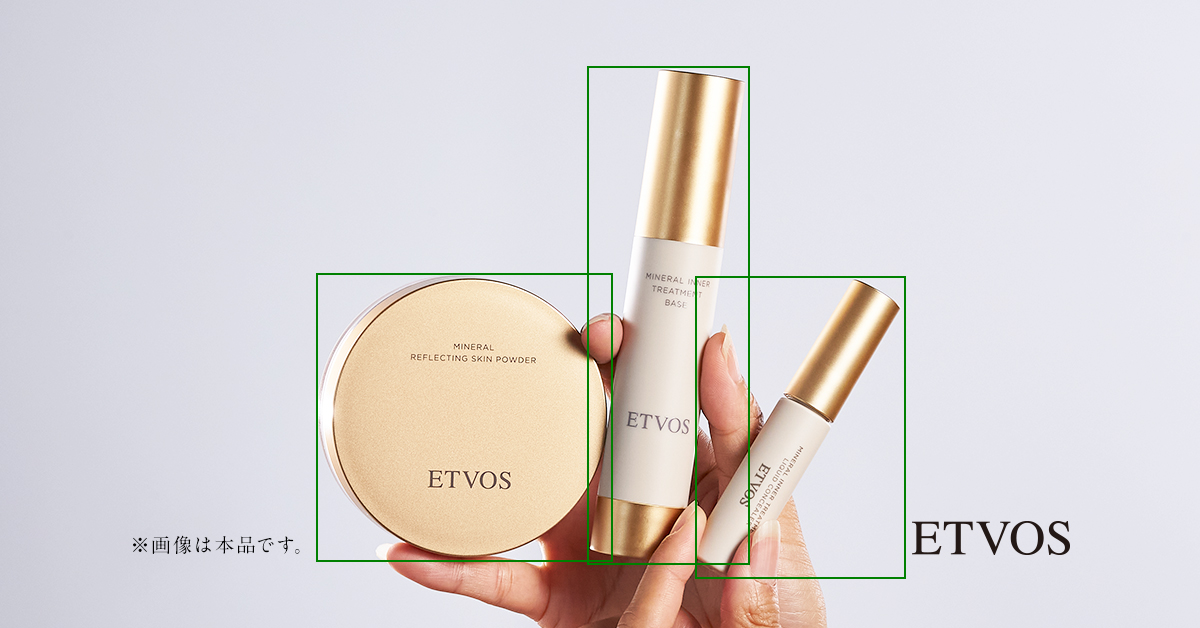

In [7]:
list_bboxes = [
    bbox
    for bboxes in text2segment_output.text2bbox_output.bboxes.values()
    for bbox in bboxes
]
draw_bboxes(image=image, bboxes=list_bboxes)

In [8]:
text2segment_output.text2bbox_output

Text2BboxOutput(bboxes={'cosmetics': [(316.20001220703125, 273.4940185546875, 612.6000366210938, 561.7460327148438), (587.4000244140625, 66.88200378417969, 749.4000244140625, 564.2579956054688), (695.4000244140625, 276.6340026855469, 905.4000244140625, 578.7020263671875)]})

In [11]:
segments = []
for mask in text2segment_output.masks:
    segment = image.copy()
    segment.putalpha(mask)
    segments.append(segment)


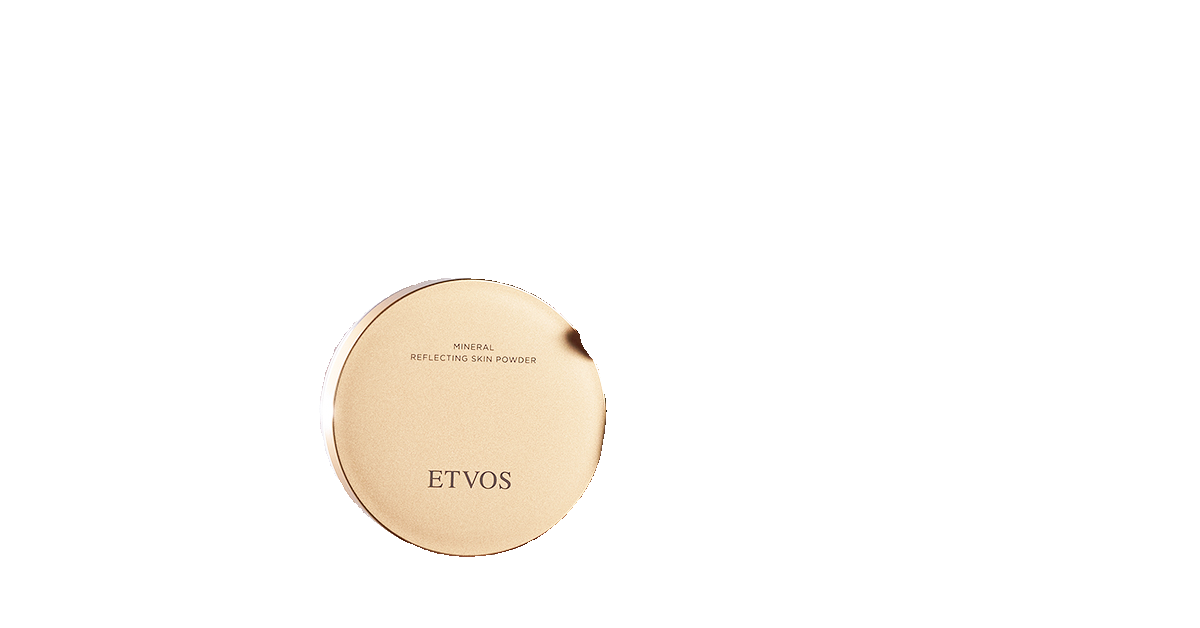

In [13]:
segments[0]

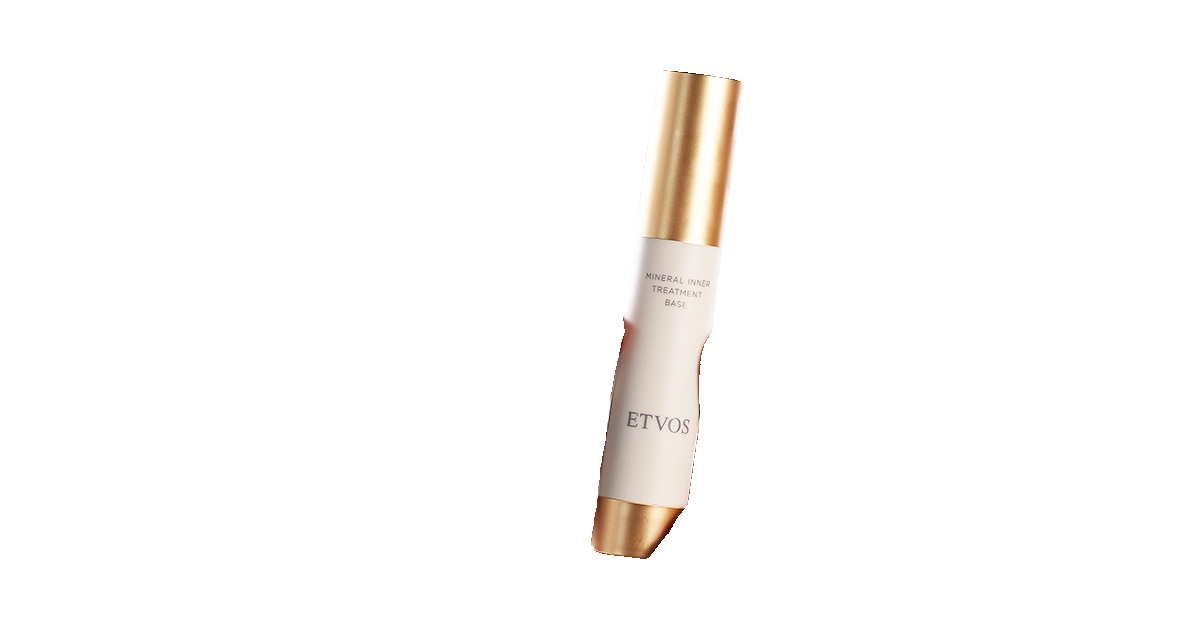

In [14]:
segments[1]

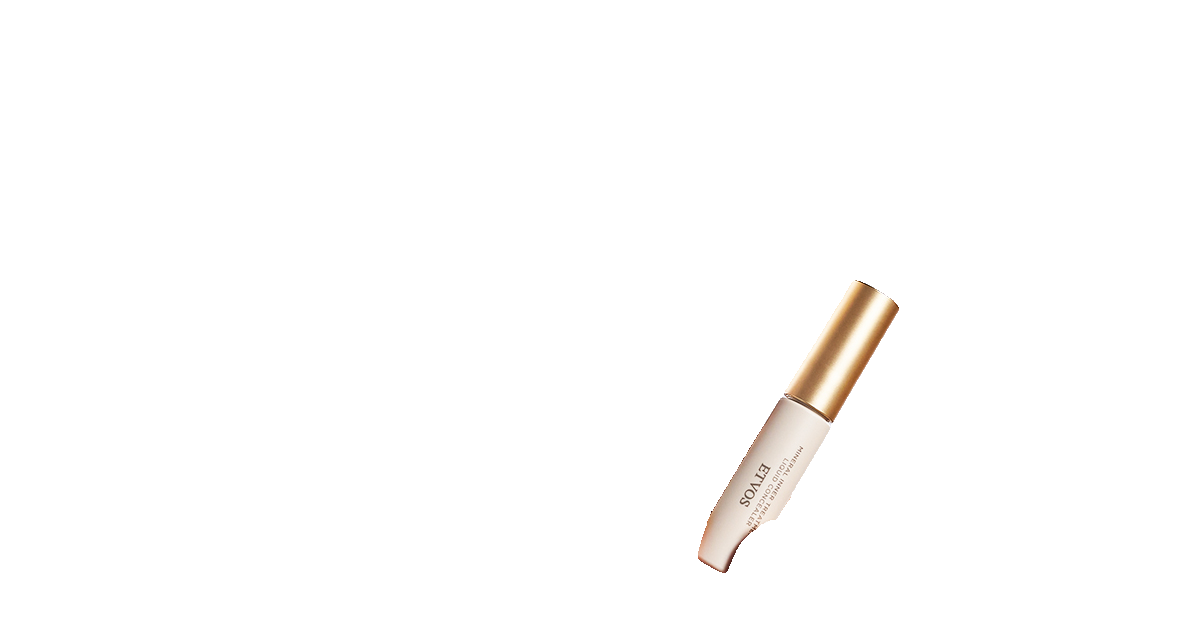

In [15]:
segments[2]